(4000, 3) (4000,)


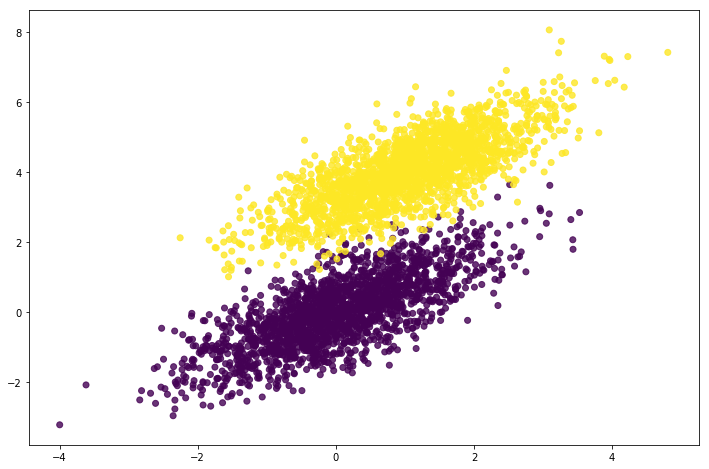

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from random import randint
%matplotlib inline

N = 2000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], N)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], N)
sim = np.vstack((x1, x2)).astype(np.float32)

data_y = np.hstack((np.zeros(N), np.ones(N)))
data_X = np.vstack((x1, x2)).astype(np.float32)
data_X = np.hstack((np.ones((data_X.shape[0], 1)), data_X)) # intercept
print(data_X.shape, data_y.shape)

# plt.figure(figsize=(12,8))
# plt.scatter(data_X[:, 1], data_X[:, 2], c = data_y, alpha = .8)

In [ ]:
def get_data():
    dataset = sklearn.datasets.load_iris()
    _dataset_X = dataset['data'][:, :2]
    _dataset_Y = dataset['target']
    
    plt.scatter(_dataset_X[:, 0], _dataset_X[:, 1], marker='o', c = _dataset_Y)
        
    convert_Y = [[0,0,1],[0,1,0],[1,0,0]]
    X = np.array(_dataset_X)
    X = np.insert(X, 0, 1, axis=1)
    Y = np.array([ convert_Y[k] for k in _dataset_Y])
    return [X, Y]

In [18]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def get_log_likelihood(X, y, beta):
    r = np.dot(X, beta)
    return np.sum(y * r - np.log(1 + np.exp(r)))

def get_gradient(X, y, yhat):
    return np.dot(X.T, y - yhat)

def logistic_regression(X, y, it, eta):    
    beta = np.zeros(X.shape[1]) # initialization
    
    for i in range(it):
        yhat = sigmoid(np.dot(X, beta)) # prediction
        gradient = get_gradient(X, y, yhat) # gradient
        beta += eta * gradient # update weights
        if i % 100 == 0:
            print("log like:",get_log_likelihood(X, y, beta))
            
    return beta

In [19]:
train_beta = logistic_regression(dataset_X, dataset_y, 500, 5e-5)
print("trained betas:",train_beta)

log like: -2120.70813922
log like: -524.137453583
log like: -340.689934341
log like: -266.419725154
log like: -225.403236268
trained betas: [-3.9276171  -1.25193704  2.50795333]


Accuracy : 0.99075


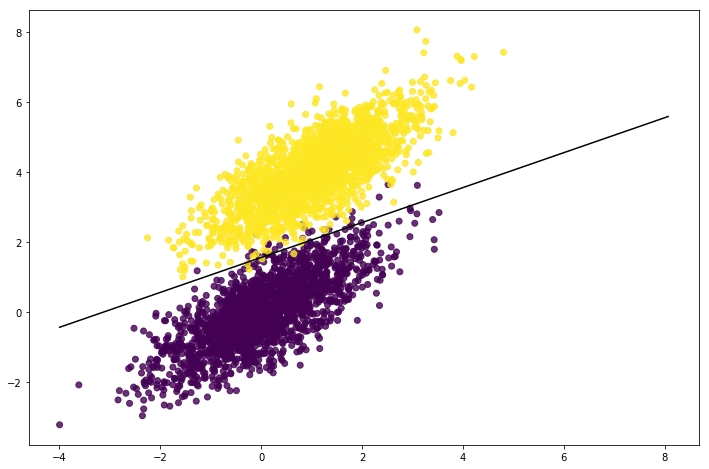

In [20]:
r = np.dot(data_X, train_beta)
yhat = np.round(sigmoid(r))
print ('Accuracy :', (yhat==data_y).sum()/len(yhat))

plt.figure(figsize = (12, 8))
plt.scatter(data_X[:, 1], data_X[:, 2], c = data_y, alpha = .8)
f = lambda x, b: (x*(-b[1])-b[0])/b[2]
x = np.array([min(data_X[:,1]),max(data_X[:,2])])
plt.plot(x, f(x,train_beta.T), marker='', color='black', linestYle='-')